In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import midii
import copy

In [3]:
# --- 2. Timing Deviation Plot Example ---
def get_deviations(notes_original, notes_quantized):
    """Calculates timing deviations for corresponding notes."""
    # NOTE: This assumes notes correspond 1-to-1 by index,
    # a robust implementation needs proper note matching.
    original_times = []
    deviations = []
    for i in range(min(len(notes_original), len(notes_quantized))):
        # Deviation for Note On
        orig_on = notes_original[i]['start']
        quant_on = notes_quantized[i]['start']
        original_times.append(orig_on)
        deviations.append(orig_on - quant_on)

        # Deviation for Note Off
        orig_off = notes_original[i]['end']
        quant_off = notes_quantized[i]['end']
        original_times.append(orig_off)
        deviations.append(orig_off - quant_off)
    return original_times, deviations


In [4]:
def normalize(json):
    offset = json[0]["start"]
    for note in json:
        note["start"] -= offset
        note["end"] -= offset
    return json

In [5]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)

In [6]:
# Create Figure 1
mid_q8 = copy.deepcopy(mid)
mid_q8.quantize(unit="8")
mid_q16 = copy.deepcopy(mid)
mid_q16.quantize(unit="16")
mid_q32 = copy.deepcopy(mid)
mid_q32.quantize(unit="32")

dataset = [
    normalize(mid.to_json()[4:12]),
    normalize(mid_q8.to_json()[4:12]),
    normalize(mid_q16.to_json()[4:12]),
    normalize(mid_q32.to_json()[4:12]),
]

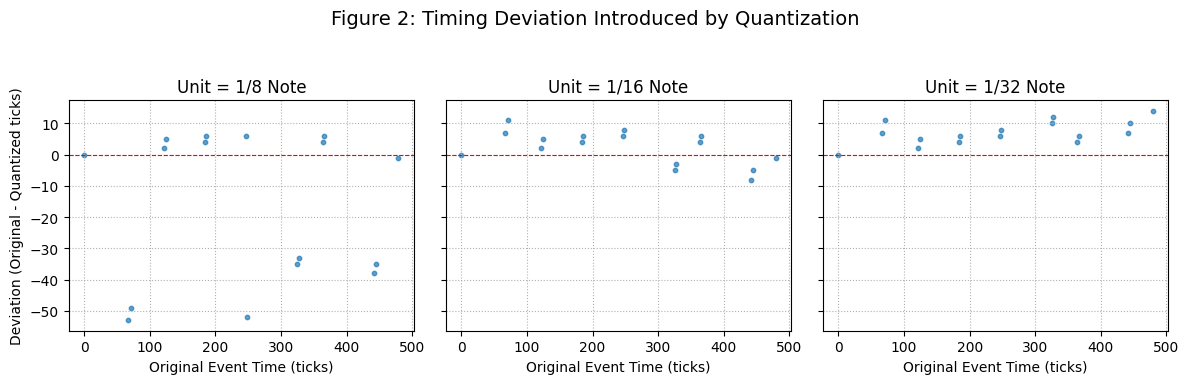

In [7]:
# Calculate deviations
times_orig8, dev_8 = get_deviations(dataset[0], dataset[1])
times_orig16, dev_16 = get_deviations(dataset[0], dataset[2])
times_orig32, dev_32 = get_deviations(dataset[0], dataset[3])

# Create Figure 2
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig2.suptitle('Figure 2: Timing Deviation Introduced by Quantization', fontsize=14)

axs2[0].scatter(times_orig8, dev_8, alpha=0.7, s=10)
axs2[0].set_title("Unit = 1/8 Note")
axs2[0].set_xlabel("Original Event Time (ticks)")
axs2[0].set_ylabel("Deviation (Original - Quantized ticks)")
axs2[0].axhline(0, color='red', linestyle='--', linewidth=0.8)
axs2[0].grid(True, linestyle=':')

axs2[1].scatter(times_orig16, dev_16, alpha=0.7, s=10)
axs2[1].set_title("Unit = 1/16 Note")
axs2[1].set_xlabel("Original Event Time (ticks)")
axs2[1].axhline(0, color='red', linestyle='--', linewidth=0.8)
axs2[1].grid(True, linestyle=':')

axs2[2].scatter(times_orig32, dev_32, alpha=0.7, s=10)
axs2[2].set_title("Unit = 1/32 Note")
axs2[2].set_xlabel("Original Event Time (ticks)")
axs2[2].axhline(0, color='red', linestyle='--', linewidth=0.8)
axs2[2].grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
# plt.show() # Use plt.savefig('figure2.png') for paper